In [2]:
import os
import pandas as pd
import geopandas as gpd
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
lakes_df = pd.read_csv('/home/emmamarshall/Desktop/phd_work/retreat/310_seasonal_velocities_LAKES.csv')
land_df_0 = pd.read_csv('/home/emmamarshall/Desktop/phd_work/retreat/310_seasonal_velocities_LANDS_0.csv')
land_df_1 = pd.read_csv('/home/emmamarshall/Desktop/phd_work/retreat/310_seasonal_velocities_LANDS_1.csv')
land_df_2 = pd.read_csv('/home/emmamarshall/Desktop/phd_work/retreat/310_seasonal_velocities_LANDS_2.csv')

## Looking at seasonal changes

In [4]:
def add_seasonal_change_cols(input_df):
    
    input_df['winter_minus_fall'] = input_df['winter'] - input_df['fall']
    input_df['spring_minus_winter'] = input_df['spring'] - input_df['winter']
    input_df['summer_minus_spring'] = input_df['summer'] - input_df['spring']
    input_df['fall_minus_summer'] = input_df['fall'] - input_df['summer']
    
    return input_df

In [5]:
lakes_df = add_seasonal_change_cols(lakes_df)

In [6]:
lands_df = pd.concat([land_df_0, land_df_1, land_df_2])

In [7]:
lands_df = add_seasonal_change_cols(lands_df)

In [8]:
lakes_diffs_mean = pd.DataFrame(lakes_df.iloc[:,7:].mean())

In [19]:
lands_diffs_mean = pd.DataFrame(lands_df.iloc[:,7:].mean())

In [20]:
lands_diffs_mean['TermType'] = 'Land'

In [9]:
lakes_diffs_mean['TermType'] = 'Lake'

In [10]:
lakes_diffs_mean = lakes_diffs_mean.reset_index().rename({'index':'season_change'},axis=1)

In [21]:
lands_diffs_mean = lands_diffs_mean.reset_index().rename({'index':'season_change'},axis=1)

In [14]:
lakes_diffs_mean

,season_change,0,TermType
0,winter_minus_fall,-0.370887,Lake
1,spring_minus_winter,6.792490,Lake
2,summer_minus_spring,-4.947368,Lake
3,fall_minus_summer,-1.474235,Lake


In [17]:
lakes_diffs_mean = lakes_diffs_mean.melt(id_vars=['season_change','TermType']).drop('variable',axis=1)

In [22]:
lands_diffs_mean = lands_diffs_mean.melt(id_vars=['season_change','TermType']).drop('variable',axis=1)

In [23]:
season_diffs_full = pd.concat([lakes_diffs_mean, lands_diffs_mean])

In [44]:
sns.color_palette('seismic')

[(0.0, 0.0, 0.6952941176470588),
 (0.1450980392156863, 0.1450980392156863, 1.0),
 (0.7098039215686275, 0.7098039215686275, 1.0),
 (1.0, 0.7098039215686274, 0.7098039215686274),
 (1.0, 0.14509803921568631, 0.14509803921568631),
 (0.7823529411764706, 0.0, 0.0)]

In [40]:
blue = sns.color_palette()[0]

Text(0.5, 1.0, 'Change in mean velocity (m/y) with change in season \n for lake-terminating, land-terminating glaciers (same 32 as GoLIVE) \n **still need to add SEM**')

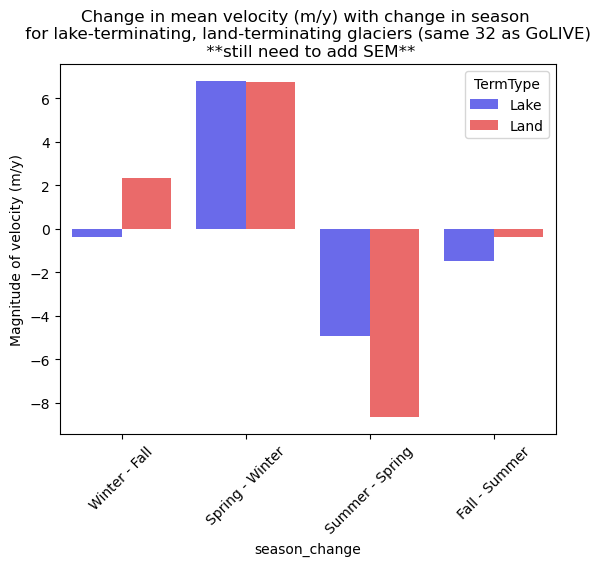

In [49]:
sns.set_palette('seismic',n_colors=2)

xlabels = ['Winter - Fall','Spring - Winter','Summer - Spring','Fall - Summer']
fig, ax = plt.subplots()
sns.barplot(data=season_diffs_full, x='season_change',y='value', hue='TermType', ax=ax)
ax.set_xticklabels(xlabels, rotation=45)
ax.set_ylabel('Magnitude of velocity (m/y)')
ax.set_title('Change in mean velocity (m/y) with change in season \n for lake-terminating, land-terminating glaciers (same 32 as GoLIVE) \n **still need to add SEM**')

<AxesSubplot: >

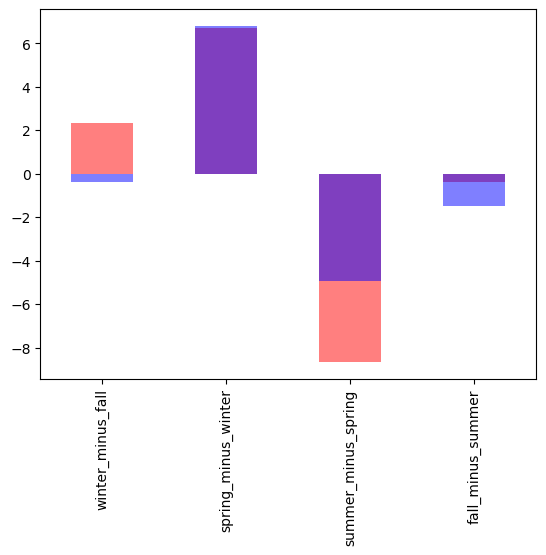

In [293]:
fig, ax = plt.subplots()

lands_df.iloc[:,7:].mean().plot.bar(ax=ax, color='red',alpha=0.5)
lakes_df.iloc[:,7:].mean().plot.bar(ax=ax, color='blue',alpha=0.5)

## Organizing into tidy format and plotting....

In [262]:
def organize_single_df(df, term_str):
    
    df = df.drop('Unnamed: 0', axis=1)
    #add term type col
    df['TermType'] = [term_str for i in range(len(df['RGIId'].to_list()))]
    df = df.melt(id_vars=['RGIId','z','TermType'])
    df = df.rename({'variable':'season'},axis=1)
    df = df.rename({'value':'mean_velocity'},axis=1)
    
    return df

In [263]:
land_df = organize_single_df(lands_df, 'Land')
lake_df = organize_single_df(lakes_df, 'Lake')

In [264]:
df_full = pd.concat([land_df, lake_df])

In [265]:
df_full

,RGIId,z,TermType,season,mean_velocity
0,RGI60-15.03976,z0,Land,winter,43.500089
1,RGI60-15.03976,z1,Land,winter,49.016882
2,RGI60-15.03976,z2,Land,winter,39.318271
3,RGI60-15.03976,z3,Land,winter,30.475781
4,RGI60-15.03976,full,Land,winter,41.219584
...,...,...,...,...,...
155,RGI60-15.10299,z0,Lake,fall,23.663428
156,RGI60-15.10299,z1,Lake,fall,35.952329
157,RGI60-15.10299,z2,Lake,fall,39.322662
158,RGI60-15.10299,z3,Lake,fall,34.420391


<AxesSubplot: xlabel='season', ylabel='mean_velocity'>

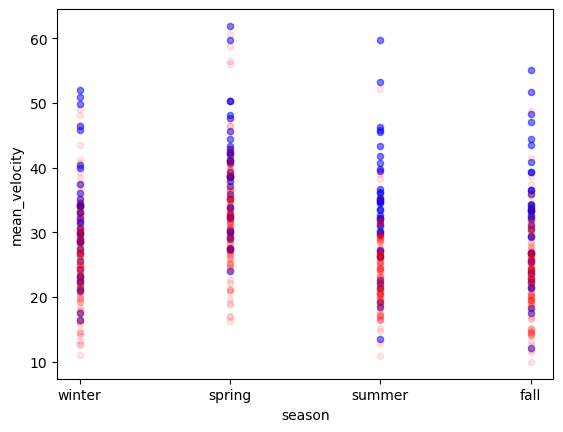

In [112]:
fig, ax = plt.subplots()

df_full.loc[df_full['TermType'] == 'Lake'].plot.scatter(x='season',y='mean_velocity', c='blue', alpha = 0.5, ax=ax,)
df_full.loc[df_full['TermType'] == 'Land'].plot.scatter(x='season',y='mean_velocity', c='red', alpha = 0.1, ax=ax)

            

Text(0.5, 0, 'Season')

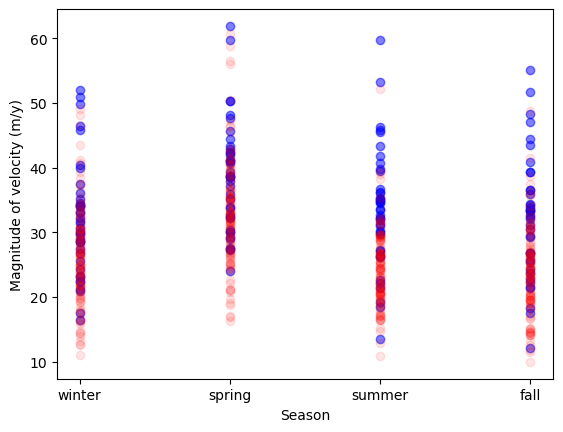

In [110]:
fig, ax = plt.subplots()

ax.scatter(x='season',y='mean_velocity', data=df_full.loc[df_full['TermType'] == 'Lake'], alpha = 0.5, c = 'blue')
ax.scatter(x='season',y='mean_velocity', data=df_full.loc[df_full['TermType'] == 'Land'], alpha = 0.1, c = 'red')
ax.set_ylabel('Magnitude of velocity (m/y)')
ax.set_xlabel('Season')

## Seaborn plotting
following Tom's [post](https://tomaugspurger.github.io/posts/modern-6-visualization/)

In [122]:
#g = sns.FacetGrid(df_full, col='season', hue = 'TermType', col_wrap=4)
#g.map(sns.regplot, 'season','mean_velocity')

## Time series analysis

In [173]:
#read in time series dfs (these are made in retreat_workflow.ipynb)

lakes = pd.read_csv('/home/emmamarshall/Desktop/phd_work/retreat/311_lakes_timeseries.csv')
lands0 = pd.read_csv('/home/emmamarshall/Desktop/phd_work/retreat/311_lands0_timeseries.csv')
lands1 = pd.read_csv('/home/emmamarshall/Desktop/phd_work/retreat/311_lands1_timeseries.csv')
lands2 = pd.read_csv('/home/emmamarshall/Desktop/phd_work/retreat/311_lands2_timeseries.csv')

In [174]:
lands = pd.concat([lands0,lands1,lands2], axis=1)

In [175]:
lands = lands.T.drop_duplicates().T

In [176]:
lands

,time,RGI60-15.03976,RGI60-15.04119,RGI60-15.04121,RGI60-15.04176,RGI60-15.04220,RGI60-15.09249,RGI60-15.09255,RGI60-15.09271,RGI60-15.09283,...,RGI60-15.09408,RGI60-15.09426,RGI60-15.09457,RGI60-15.09459,RGI60-15.09474,RGI60-15.09475,RGI60-15.09481,RGI60-15.09491,RGI60-15.09492,RGI60-15.09500
0,2014-10-23,32.307012,17.600778,28.213532,NaN,NaN,25.625898,38.394452,30.009865,32.494649,...,20.412486,21.067421,20.554378,20.409277,23.681444,NaN,NaN,NaN,NaN,21.952995
1,2014-10-31,39.255225,25.670091,24.802363,28.460901,35.766573,24.554155,24.583363,23.157179,16.955881,...,16.808804,21.148618,21.251353,21.765916,19.221168,14.568399,16.055063,18.131599,NaN,24.257594
2,2014-11-12,41.519917,19.249023,22.342249,22.034004,26.808664,24.740408,30.672933,29.600592,26.786936,...,21.038526,22.875291,25.140214,20.616901,20.834844,17.539001,17.910202,17.466461,NaN,19.372415
3,2014-11-16,46.998716,24.741328,32.536565,NaN,NaN,19.674316,42.973705,37.503955,27.749493,...,19.031117,17.140096,20.107463,23.922628,25.294127,NaN,NaN,NaN,NaN,28.268568
4,2014-11-24,50.000478,31.953327,21.79696,22.810005,20.441251,17.613235,21.044849,27.109941,15.305,...,17.64873,17.701318,18.671054,14.703214,15.895845,12.456594,12.934585,11.418001,NaN,16.282919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,2021-06-26,56.626997,24.304272,27.412875,42.549469,36.128367,27.396479,39.405104,29.746131,19.912481,...,15.732653,21.669248,30.321547,17.997872,31.190272,10.834816,16.997317,11.39317,NaN,29.494895
310,2021-07-08,52.681555,25.946821,21.574901,24.048689,24.828782,24.606899,25.133025,19.915987,19.726577,...,15.239884,25.227444,19.560062,20.513391,26.236846,8.498083,13.106939,8.469746,NaN,21.791967
311,2021-07-20,41.763176,35.239252,26.013759,29.130243,24.45879,18.131804,30.907491,18.015096,20.810996,...,19.632326,20.708811,21.896402,22.686029,29.920884,8.555064,18.553159,11.861686,NaN,29.256014
312,2021-10-12,36.895512,25.694241,24.976194,37.148514,24.78302,19.721321,35.173679,25.909669,17.408234,...,23.522473,23.094037,28.818369,17.310805,27.16413,17.803274,19.575182,20.663303,NaN,20.980865


In [177]:
lakes = lakes.melt(id_vars='time')#.rename({'value':'velocity', 'variable':'RGIId'},axis=1)

In [178]:
lakes.head()

,time,variable,value
0,2014-10-23,RGI60-15.10255,37.203957
1,2014-10-31,RGI60-15.10255,28.964534
2,2014-11-12,RGI60-15.10255,29.058171
3,2014-11-16,RGI60-15.10255,35.539512
4,2014-11-24,RGI60-15.10255,21.729068


In [179]:
lands = lands.melt(id_vars='time')#.rename({'value':'velocity', 'variable':'RGIId'},axis=1)

In [256]:
#lands_gb = lands.groupby(lands.time.dt.season).mean()
lands['time'] = lands['time'].astype(np.datetime64)

In [259]:
lands_gb = lands.groupby(lands.time.dt.season).mean()


AttributeError: 'DatetimeProperties' object has no attribute 'season'

In [197]:
time_ls = list(lands['time'].unique())

Text(0.5, 1.0, 'Mean velocity over time of lake-terminating glaciers (blue, n=8) \n and land-terminating glaciers (red, n=24)')

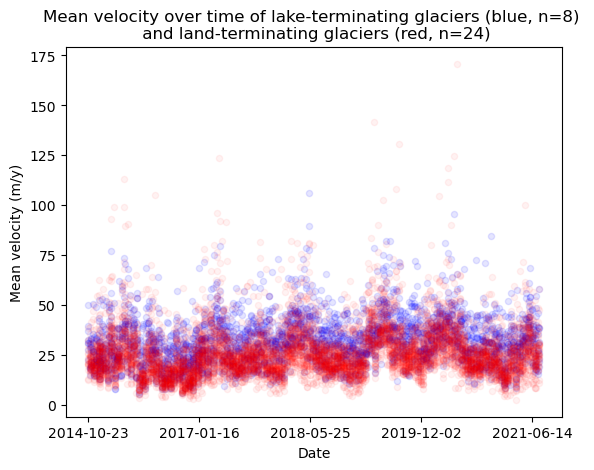

In [250]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

lakes.plot.scatter(x='time', y='value', alpha=0.1, c='blue', ax=ax)
lands.plot.scatter(x='time', y='value', c='red', ax=ax, alpha = 0.05)
ax.set_ylabel('Mean velocity (m/y)')
ax.set_xlabel('Date')

ax.set_xticks(ax.get_xticks()[::75]) # only show one tick every 75 time steps
ax.set_title('Mean velocity over time of lake-terminating glaciers (blue, n=8) \n and land-terminating glaciers (red, n=24)')